Libraries

In [28]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

In this section, I want to obtain two securities that have little correlation with each other.
I think that gold and S&P500 should have little positive or even negative correlation

In [29]:
tickers = ['GLD','^GSPC']
yfin.pdr_override() #  you ensure compatibility with the Yahoo Finance API changes and possibly improve the reliability and functionality of data retrieval from Yahoo Finance within your code
data = pd.DataFrame()
for t in tickers:
    data[t] = pdr.get_data_yahoo(t, start="2012-03-30", end="2024-03-30")['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [30]:
data.head()

,GLD,^GSPC
Date,,
2012-03-30,162.119995,1408.469971
2012-04-02,162.940002,1419.040039
2012-04-03,159.889999,1413.380005
2012-04-04,157.210007,1398.959961
2012-04-05,158.309998,1398.079956


In [31]:
data.tail()

,GLD,^GSPC
Date,,
2024-03-22,200.350006,5234.180176
2024-03-25,200.990005,5218.189941
2024-03-26,201.639999,5203.580078
2024-03-27,203.100006,5248.490234
2024-03-28,205.720001,5254.350098


Daily retrun

In [32]:
simple_return_d = data/data.shift(1)-1
simple_return_d

,GLD,^GSPC
Date,,
2012-03-30,NaN,NaN
2012-04-02,0.005058,0.007505
2012-04-03,-0.018719,-0.003989
2012-04-04,-0.016761,-0.010203
2012-04-05,0.006997,-0.000629
...,...,...
2024-03-22,-0.008021,-0.001402
2024-03-25,0.003194,-0.003055
2024-03-26,0.003234,-0.002800


In [33]:
simple_return_d[np.isnan(simple_return_d)] = 0
simple_return_d

,GLD,^GSPC
Date,,
2012-03-30,0.000000,0.000000
2012-04-02,0.005058,0.007505
2012-04-03,-0.018719,-0.003989
2012-04-04,-0.016761,-0.010203
2012-04-05,0.006997,-0.000629
...,...,...
2024-03-22,-0.008021,-0.001402
2024-03-25,0.003194,-0.003055
2024-03-26,0.003234,-0.002800


In [34]:
avg_return = (simple_return_d).mean()
print('average daily return:\n',avg_return)
print('avg daily return for the market: ', avg_return.iloc[1])

average daily return:
 GLD      0.000122
^GSPC    0.000493
dtype: float64
avg daily return for the market:  0.0004933871755456479


In [35]:
std_d = (simple_return_d).std()
print('std deviation of daily return:\n',std_d)

std deviation of daily return:
 GLD      0.009317
^GSPC    0.010662
dtype: float64


In [36]:
covar = (simple_return_d).cov()
print('covariance of daily return:\n',covar)

covariance of daily return:
             GLD     ^GSPC
GLD    0.000087  0.000004
^GSPC  0.000004  0.000114


In [37]:
var = (simple_return_d).var()
print('variance of daily return:\n',var)

variance of daily return:
 GLD      0.000087
^GSPC    0.000114
dtype: float64


In [38]:
correlation = (simple_return_d).corr()
print('correlation matrix for two securities:\n',correlation)
cor=correlation.loc[tickers[0]][tickers[1]]
print('correlation between two securities: ', cor)

correlation matrix for two securities:
            GLD    ^GSPC
GLD    1.00000  0.04001
^GSPC  0.04001  1.00000
correlation between two securities:  0.04000951035447616


In [39]:
Beta_daily = covar.iloc[0,1]/var.iloc[1]
print(Beta_daily)

0.03496212607219086


assign random weight

In [40]:
RW = np.random.random(len(tickers)) # two random number that should be normalized
w = RW/sum(RW)
w # weight of each security

array([0.82167632, 0.17832368])

Expected portfolio retrun

In [46]:
np.sum(w * avg_return*250)

0.11651880249235225

Expected portfolio volatility

In [51]:
np.sqrt(np.dot(w.T,np.dot(covar,w))*250)

0.11323490717174418

portfolio retrun and volatility simulation

In [52]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    RW = np.random.random(len(tickers)) # two random number that should be normalized
    w = RW/sum(RW)
    pfolio_returns.append(np.sum(w * avg_return*250))
    pfolio_volatilities.append(np.sqrt(np.dot(w.T,np.dot(covar,w))*250))

pfolio_returns, pfolio_volatilities

([0.055729726942616714,
  0.07794278777779681,
  0.06018390223641972,
  0.11664478060688996,
  0.04946911330039144,
  0.0772069524857578,
  0.08275297154704353,
  0.07663778417327657,
  0.06437773810932604,
  0.05997385849385057,
  0.07420994787230907,
  0.07360279639759393,
  0.06346126688582002,
  0.05546406847776682,
  0.04663662260831854,
  0.06950634000630494,
  0.1104022573376533,
  0.08713296873429055,
  0.11835784043978656,
  0.06209048959432767,
  0.06158594942990381,
  0.07329164835849979,
  0.04623204982796899,
  0.0627244270471556,
  0.10694170302135725,
  0.0333964118778166,
  0.049322971080073885,
  0.05527288424913524,
  0.048929357103799725,
  0.07314440368576035,
  0.07744028024189509,
  0.07943052516999247,
  0.11895571217145899,
  0.0719225012059414,
  0.10551288517349437,
  0.07652803974133618,
  0.11242644034174284,
  0.051520099990533266,
  0.10835251860729432,
  0.08012767592156204,
  0.10748130503715096,
  0.042036495062999966,
  0.07983959263861228,
  0.0910879

In [53]:
#pfolio_returns = np.array(pfolio_returns)
#pfolio_volatilities = np.array(pfolio_volatilities)

Text(0, 0.5, 'Expected Return')

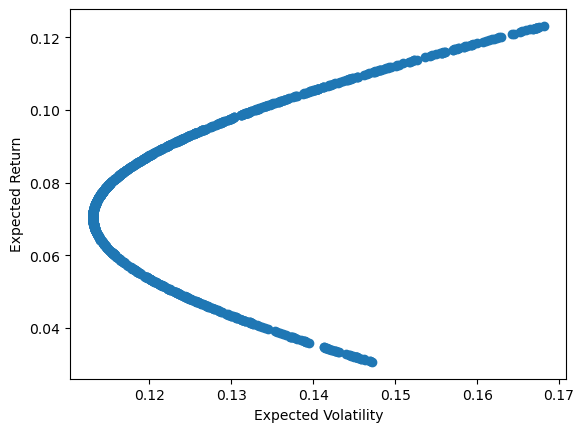

In [54]:
plt.plot(pfolio_volatilities, pfolio_returns,'o')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')